<a href="https://colab.research.google.com/github/alhasanmolla/Quant-Researcher/blob/main/highest_correlation_to_Tesla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*****************

Top 10 Companies most positively correlated with Tesla:
GEV     0.790686
SW      0.725503
CSCO    0.642846
CCL     0.615002
BKR     0.607882
Name: TSLA, dtype: float64

Top 10 Companies most negatively correlated with Tesla:
DG     -0.547402
DIS    -0.545284
MRNA   -0.530979
TGT    -0.514503
A      -0.505690
Name: TSLA, dtype: float64


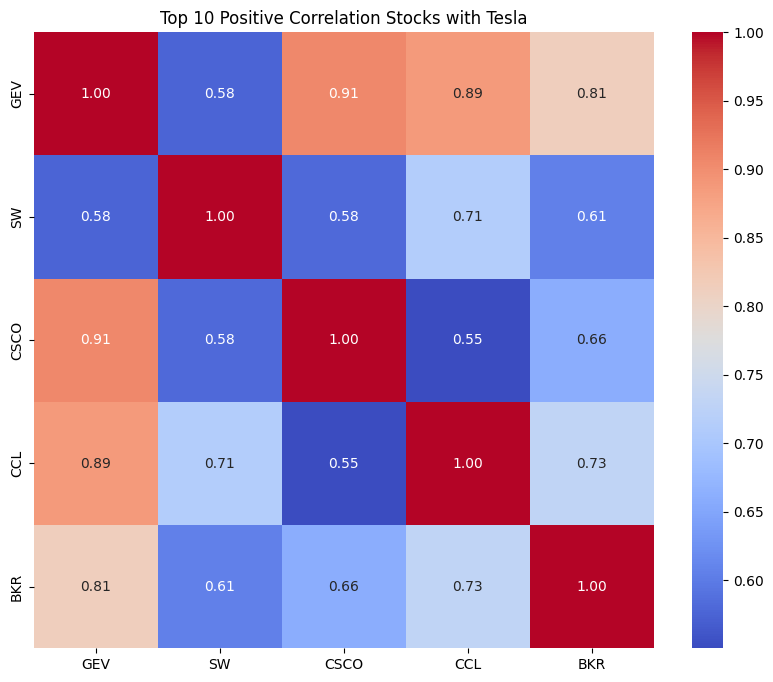

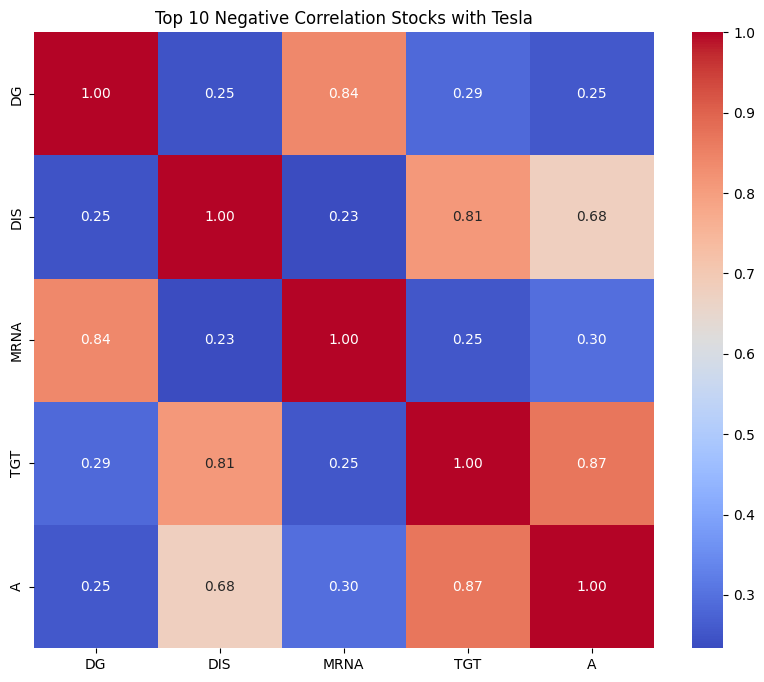

In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set your threshold for positive and negative correlation
positive_correlation_threshold = 0.7
negative_correlation_threshold = -0.7

# List of 500 tickers including Tesla and other S&P 500 companies
tickers = ['NVDA', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'GOOGL', 'META', 'TSLA', 'BRK.B', 'AVGO', 'LLY', 'WMT', 'JPM',
           'V', 'UNH', 'XOM', 'ORCL', 'MA', 'COST', 'HD', 'PG', 'JNJ', 'ABBV', 'BAC', 'NFLX', 'CRM', 'CVX', 'KO',
           'TMUS', 'MRK', 'AMD', 'WFC', 'CSCO', 'PEP', 'ACN', 'LIN', 'ADBE', 'BX', 'MCD', 'TMO', 'MS', 'NOW', 'AXP',
           'ABT', 'TXN', 'GE', 'IBM', 'PM', 'GS', 'INTU', 'ISRG', 'CAT', 'QCOM', 'DIS', 'DHR', 'AMGN', 'VZ', 'CMCSA',
           'RTX', 'BKNG', 'T', 'AMAT', 'NEE', 'SPGI', 'BLK', 'LOW', 'PGR', 'UBER', 'PFE', 'UNP', 'ETN', 'SYK', 'HON',
           'KKR', 'SCHW', 'LMT', 'VRTX', 'PLTR', 'TJX', 'BSX', 'C', 'COP', 'PANW', 'ANET', 'ADP', 'MU', 'GILD', 'FI',
           'CB', 'BA', 'UPS', 'INTC', 'NKE', 'MDT', 'ADI', 'MMC', 'SBUX', 'BMY', 'PLD', 'DE', 'LRCX', 'ELV', 'SO',
           'SHW', 'AMT', 'DELL', 'GEV', 'TT', 'KLAC', 'MO', 'CTAS', 'WM', 'ICE', 'HCA', 'PH', 'REGN', 'APH', 'CI',
           'EQIX', 'MDLZ', 'DUK', 'MCO', 'SNPS', 'WELL', 'GD', 'MSI', 'ABNB', 'PYPL', 'AON', 'CDNS', 'CME', 'PNC',
           'CRWD', 'ITW', 'CMG', 'ZTS', 'USB', 'MAR', 'MCK', 'NOC', 'EOG', 'TDG', 'CL', 'CEG', 'MMM', 'EMR', 'ECL',
           'COF', 'ORLY', 'FTNT', 'FDX', 'CVS', 'APD', 'CSX', 'TGT', 'CARR', 'WMB', 'SPG', 'BDX', 'FCX', 'RSG', 'ADSK',
           'AJG', 'CHTR', 'OKE', 'DLR', 'NSC', 'GM', 'SLB', 'ROP', 'RCL', 'HLT', 'AFL', 'TFC', 'PCAR', 'KMI', 'PSA',
           'NXPI', 'GWW', 'TRV', 'SRE', 'URI', 'FICO', 'JCI', 'MET', 'BK', 'DHI', 'CPRT', 'AMP', 'PAYX', 'FANG', 'MNST',
           'AZO', 'PSX', 'ALL', 'AEP', 'NEM', 'O', 'LHX', 'MPC', 'CMI', 'PWR', 'COR', 'D', 'ODFL', 'VST', 'FAST', 'ROST',
           'FIS', 'OXY', 'AIG', 'TEL', 'LEN', 'MSCI', 'HWM', 'CCI', 'AXON', 'KVUE', 'NDAQ', 'KDP', 'KMB', 'AME', 'PCG',
           'DFS', 'HES', 'F', 'PRU', 'KR', 'VLO', 'PEG', 'BKR', 'STZ', 'IT', 'TRGP', 'GLW', 'EA', 'IR', 'CBRE', 'GRMN',
           'VRSK', 'CTVA', 'OTIS', 'KHC', 'CTSH', 'IQV', 'A', 'GEHC', 'DAL', 'MCHP', 'EW', 'XEL', 'VMC', 'EXC', 'YUM',
           'ACGL', 'SYY', 'LULU', 'MLM', 'NUE', 'MPWR', 'RMD', 'EXR', 'LVS', 'GIS', 'HSY', 'HPQ', 'IDXX', 'DD', 'WAB',
           'IRM', 'MTB', 'HUM', 'HIG', 'ED', 'EFX', 'AVB', 'VICI', 'DOW', 'RJF', 'EIX', 'BRO', 'ETR', 'WTW', 'CSGP', 'CCL',
           'TTWO', 'TSCO', 'FITB', 'ROK', 'WEC', 'CNC', 'XYL', 'ON', 'ANSS', 'EBAY', 'CAH', 'PPG', 'UAL', 'EQR', 'KEYS',
           'HPE', 'NVR', 'LYV', 'GPN', 'K', 'MTD', 'STT', 'LYB', 'DOV', 'VTR', 'DXCM', 'PHM', 'SW', 'DECK', 'TYL', 'CDW',
           'AWK', 'LDOS', 'BR', 'TROW', 'VLTO', 'FTV', 'CHD', 'HAL', 'DVN', 'CPAY', 'NTAP', 'BIIB', 'HBAN', 'HUBB', 'GDDY',
           'ADM', 'SYF', 'EQT', 'PPL', 'DTE', 'ROL', 'SBAC', 'AEE', 'WDC', 'FE', 'IFF', 'WST', 'EXPE', 'RF', 'CINF', 'WY',
           'PTC', 'WRB', 'EL', 'STLD', 'WAT', 'TDY', 'WBD', 'ES', 'ATO', 'ERIE', 'STX', 'STE', 'ZBH', 'PKG', 'TSN', 'NTRS',
           'MKC', 'FSLR', 'INVH', 'COO', 'CBOE', 'ZBRA', 'BLDR', 'CLX', 'OMC', 'FOXA', 'ESS', 'LH', 'CFG', 'CMS', 'IP',
           'ARE', 'CNP', 'DRI', 'NRG', 'FOX', 'PFG', 'JBHT', 'BF.B', 'BBY', 'MAA', 'LUV', 'SNA', 'MOH', 'KEY', 'PODD', 'HOLX',
           'GEN', 'J', 'ULTA', 'FDS', 'CTRA', 'L', 'TER', 'MRNA', 'BALL', 'DGX', 'TRMB', 'BAX', 'VRSN', 'MAS', 'IEX', 'NWS',
           'PNR', 'GPC', 'DG', 'KIM', 'EXPD', 'NI', 'NWSA', 'HRL', 'UDR', 'AVY', 'ALGN', 'TXT', 'DOC', 'INCY', 'MRO', 'DPZ',
           'EG', 'VTRS', 'JBL', 'NDSN', 'RVTY', 'LNT', 'AMCR', 'BXP', 'CF', 'EVRG', 'SMCI', 'SWKS', 'POOL', 'FFIV', 'SWK',
           'UHS', 'RL', 'CAG', 'CPB', 'REG', 'AKAM', 'EPAM', 'APTV', 'DLTR', 'CPT', 'JKHY', 'JNPR', 'CHRW', 'DAY', 'PAYC',
           'HST', 'SOLV', 'ALLE', 'TAP', 'SJM', 'DVA', 'TPR', 'BG', 'TECH', 'NCLH', 'ALB', 'EMN', 'KMX', 'LW', 'GNRC', 'IPG',
           'BEN', 'CRL', 'MGM', 'AOS', 'CTLT', 'AIZ', 'PNW', 'MKTX', 'LKQ', 'FRT', 'AES', 'CE', 'MHK', 'WYNN', 'GL', 'TFX',
           'ENPH', 'AXON', 'TWTR', 'VIST', 'EXAS', 'IDXX', 'YETI', 'TSLA']

# Download data and handle errors
data = pd.DataFrame()
for ticker in tickers:
    try:
        # add datetime or stock_data = yf.download(ticker, period="1y")['Adj Close']
        stock_data = yf.download(ticker, start="2023-01-01", end="2024-11-16")['Adj Close']
        data[ticker] = stock_data
    except (yfinance.errors.YFTzMissingError, yfinance.errors.YFPricesMissingError):
        print(f"Warning: {ticker} data unavailable or possibly delisted. Skipping...")

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Find the companies with highest correlation to Tesla
tesla_corr = correlation_matrix["TSLA"].sort_values(ascending=False)

# Print companies most correlated with Tesla (excluding TSLA itself)
print("Top 10 Companies most positively correlated with Tesla:")
top_10_pos_corr = tesla_corr[1:6]  # Top 10 excluding TSLA itself
print(top_10_pos_corr)

# Find the companies with negative correlation to Tesla
tesla_neg_corr = correlation_matrix["TSLA"].sort_values(ascending=True)

# Print companies most negatively correlated with Tesla
print("\nTop 10 Companies most negatively correlated with Tesla:")
top_10_neg_corr = tesla_neg_corr[1:6]  # Top 10 excluding TSLA itself
print(top_10_neg_corr)

# Generate heatmap for the top 10 positively correlated stocks
top_10_pos_corr_stocks = correlation_matrix.loc[top_10_pos_corr.index, top_10_pos_corr.index]
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_pos_corr_stocks, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Positive Correlation Stocks with Tesla')
plt.show()

# Generate heatmap for the top 10 negatively correlated stocks
top_10_neg_corr_stocks = correlation_matrix.loc[top_10_neg_corr.index, top_10_neg_corr.index]
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_neg_corr_stocks, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Negative Correlation Stocks with Tesla')
plt.show()


In [2]:
import yfinance as yf
import pandas as pd

# Set your threshold for positive correlation
positive_correlation_threshold = 0.7
# Set your threshold for negative correlation
negative_correlation_threshold = -0.7

# List of 500 tickers including Tesla and other S&P 500 companies
tickers = ['NVDA', 'AAPL', 'MSFT', 'GOOG', 'AMZN', 'GOOGL', 'META', 'TSLA', 'BRK.B', 'AVGO', 'LLY', 'WMT', 'JPM',
           'V', 'UNH', 'XOM', 'ORCL', 'MA', 'COST', 'HD', 'PG', 'JNJ', 'ABBV', 'BAC', 'NFLX', 'CRM', 'CVX', 'KO',
           'TMUS', 'MRK', 'AMD', 'WFC', 'CSCO', 'PEP', 'ACN', 'LIN', 'ADBE', 'BX', 'MCD', 'TMO', 'MS', 'NOW', 'AXP',
           'ABT', 'TXN', 'GE', 'IBM', 'PM', 'GS', 'INTU', 'ISRG', 'CAT', 'QCOM', 'DIS', 'DHR', 'AMGN', 'VZ', 'CMCSA',
           'RTX', 'BKNG', 'T', 'AMAT', 'NEE', 'SPGI', 'BLK', 'LOW', 'PGR', 'UBER', 'PFE', 'UNP', 'ETN', 'SYK', 'HON',
           'KKR', 'SCHW', 'LMT', 'VRTX', 'PLTR', 'TJX', 'BSX', 'C', 'COP', 'PANW', 'ANET', 'ADP', 'MU', 'GILD', 'FI',
           'CB', 'BA', 'UPS', 'INTC', 'NKE', 'MDT', 'ADI', 'MMC', 'SBUX', 'BMY', 'PLD', 'DE', 'LRCX', 'ELV', 'SO',
           'SHW', 'AMT', 'DELL', 'GEV', 'TT', 'KLAC', 'MO', 'CTAS', 'WM', 'ICE', 'HCA', 'PH', 'REGN', 'APH', 'CI',
           'EQIX', 'MDLZ', 'DUK', 'MCO', 'SNPS', 'WELL', 'GD', 'MSI', 'ABNB', 'PYPL', 'AON', 'CDNS', 'CME', 'PNC',
           'CRWD', 'ITW', 'CMG', 'ZTS', 'USB', 'MAR', 'MCK', 'NOC', 'EOG', 'TDG', 'CL', 'CEG', 'MMM', 'EMR', 'ECL',
           'COF', 'ORLY', 'FTNT', 'FDX', 'CVS', 'APD', 'CSX', 'TGT', 'CARR', 'WMB', 'SPG', 'BDX', 'FCX', 'RSG', 'ADSK',
           'AJG', 'CHTR', 'OKE', 'DLR', 'NSC', 'GM', 'SLB', 'ROP', 'RCL', 'HLT', 'AFL', 'TFC', 'PCAR', 'KMI', 'PSA',
           'NXPI', 'GWW', 'TRV', 'SRE', 'URI', 'FICO', 'JCI', 'MET', 'BK', 'DHI', 'CPRT', 'AMP', 'PAYX', 'FANG', 'MNST',
           'AZO', 'PSX', 'ALL', 'AEP', 'NEM', 'O', 'LHX', 'MPC', 'CMI', 'PWR', 'COR', 'D', 'ODFL', 'VST', 'FAST', 'ROST',
           'FIS', 'OXY', 'AIG', 'TEL', 'LEN', 'MSCI', 'HWM', 'CCI', 'AXON', 'KVUE', 'NDAQ', 'KDP', 'KMB', 'AME', 'PCG',
           'DFS', 'HES', 'F', 'PRU', 'KR', 'VLO', 'PEG', 'BKR', 'STZ', 'IT', 'TRGP', 'GLW', 'EA', 'IR', 'CBRE', 'GRMN',
           'VRSK', 'CTVA', 'OTIS', 'KHC', 'CTSH', 'IQV', 'A', 'GEHC', 'DAL', 'MCHP', 'EW', 'XEL', 'VMC', 'EXC', 'YUM',
           'ACGL', 'SYY', 'LULU', 'MLM', 'NUE', 'MPWR', 'RMD', 'EXR', 'LVS', 'GIS', 'HSY', 'HPQ', 'IDXX', 'DD', 'WAB',
           'IRM', 'MTB', 'HUM', 'HIG', 'ED', 'EFX', 'AVB', 'VICI', 'DOW', 'RJF', 'EIX', 'BRO', 'ETR', 'WTW', 'CSGP', 'CCL',
           'TTWO', 'TSCO', 'FITB', 'ROK', 'WEC', 'CNC', 'XYL', 'ON', 'ANSS', 'EBAY', 'CAH', 'PPG', 'UAL', 'EQR', 'KEYS',
           'HPE', 'NVR', 'LYV', 'GPN', 'K', 'MTD', 'STT', 'LYB', 'DOV', 'VTR', 'DXCM', 'PHM', 'SW', 'DECK', 'TYL', 'CDW',
           'AWK', 'LDOS', 'BR', 'TROW', 'VLTO', 'FTV', 'CHD', 'HAL', 'DVN', 'CPAY', 'NTAP', 'BIIB', 'HBAN', 'HUBB', 'GDDY',
           'ADM', 'SYF', 'EQT', 'PPL', 'DTE', 'ROL', 'SBAC', 'AEE', 'WDC', 'FE', 'IFF', 'WST', 'EXPE', 'RF', 'CINF', 'WY',
           'PTC', 'WRB', 'EL', 'STLD', 'WAT', 'TDY', 'WBD', 'ES', 'ATO', 'ERIE', 'STX', 'STE', 'ZBH', 'PKG', 'TSN', 'NTRS',
           'MKC', 'FSLR', 'INVH', 'COO', 'CBOE', 'ZBRA', 'BLDR', 'CLX', 'OMC', 'FOXA', 'ESS', 'LH', 'CFG', 'CMS', 'IP',
           'ARE', 'CNP', 'DRI', 'NRG', 'FOX', 'PFG', 'JBHT', 'BF.B', 'BBY', 'MAA', 'LUV', 'SNA', 'MOH', 'KEY', 'PODD', 'HOLX',
           'GEN', 'J', 'ULTA', 'FDS', 'CTRA', 'L', 'TER', 'MRNA', 'BALL', 'DGX', 'TRMB', 'BAX', 'VRSN', 'MAS', 'IEX', 'NWS',
           'PNR', 'GPC', 'DG', 'KIM', 'EXPD', 'NI', 'NWSA', 'HRL', 'UDR', 'AVY', 'ALGN', 'TXT', 'DOC', 'INCY', 'MRO', 'DPZ',
           'EG', 'VTRS', 'JBL', 'NDSN', 'RVTY', 'LNT', 'AMCR', 'BXP', 'CF', 'EVRG', 'SMCI', 'SWKS', 'POOL', 'FFIV', 'SWK',
           'UHS', 'RL', 'CAG', 'CPB', 'REG', 'AKAM', 'EPAM', 'APTV', 'DLTR', 'CPT', 'JKHY', 'JNPR', 'CHRW', 'DAY', 'PAYC',
           'HST', 'SOLV', 'ALLE', 'TAP', 'SJM', 'DVA', 'TPR', 'BG', 'TECH', 'NCLH', 'ALB', 'EMN', 'KMX', 'LW', 'GNRC', 'IPG',
           'BEN', 'CRL', 'MGM', 'AOS', 'CTLT', 'AIZ', 'PNW', 'MKTX', 'LKQ', 'FRT', 'AES', 'CE', 'MHK', 'WYNN', 'GL', 'TFX',
           'ENPH', 'CHD', 'RGA', 'WYN', 'TDC', 'BWA', 'TRU', 'WRK', 'EXAS', 'ZTS', 'AKAM', 'SE', 'DOCU', 'PGRE', 'BMY', 'GILD',
           'VZ', 'HCA', 'DISH', 'BBY', 'SIVB', 'DG', 'SWK', 'ALXN', 'PFE', 'SBUX', 'YUMC', 'ZBRA', 'XRX', 'YETI', 'TSLA']

# Download data and handle errors
data = pd.DataFrame()
for ticker in tickers:
    try:
        stock_data = yf.download(ticker, start="2023-01-01", end="2024-11-16")['Adj Close']
        data[ticker] = stock_data
    except (yfinance.errors.YFTzMissingError, yfinance.errors.YFPricesMissingError):
        print(f"Warning: {ticker} data unavailable or possibly delisted. Skipping...")

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Find the companies with highest correlation to Tesla
tesla_corr = correlation_matrix["TSLA"].sort_values(ascending=False)

# Print companies most correlated with Tesla (excluding TSLA itself)
print("Companies most correlated with Tesla:")
print(tesla_corr[1:])  # Exclude TSLA itself

# Find the companies with negative correlation to Tesla
tesla_neg_corr = correlation_matrix["TSLA"].sort_values(ascending=True)

# Print companies with negative correlation to Tesla
print("\nCompanies most negatively correlated with Tesla:")
print(tesla_neg_corr[1:])  # Exclude TSLA itself

# Filter stocks that are highly correlated with Tesla (greater than the threshold)
highly_correlated = correlation_matrix['TSLA'][correlation_matrix['TSLA'] > positive_correlation_threshold].index.tolist()

# Output the stocks highly correlated with TSLA
print("\nStocks with high positive correlation to Tesla (TSLA):")
print(highly_correlated)

# Filter stocks that are highly negatively correlated with Tesla (less than the threshold)
highly_neg_correlated = correlation_matrix['TSLA'][correlation_matrix['TSLA'] < negative_correlation_threshold].index.tolist()

# Output the stocks highly negatively correlated with TSLA
print("\nStocks with high negative correlation to Tesla (TSLA):")
print(highly_neg_correlated)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*****************

Companies most correlated with Tesla:
GEV     0.790686
SW      0.725503
CSCO    0.642846
CCL     0.615002
BKR     0.607882
          ...   
WYN          NaN
WRK          NaN
DISH         NaN
SIVB         NaN
ALXN         NaN
Name: TSLA, Length: 504, dtype: float64

Companies most negatively correlated with Tesla:
DG     -0.547402
DIS    -0.545284
MRNA   -0.530979
TGT    -0.514503
A      -0.505690
          ...   
WYN          NaN
WRK          NaN
DISH         NaN
SIVB         NaN
ALXN         NaN
Name: TSLA, Length: 504, dtype: float64

Stocks with high positive correlation to Tesla (TSLA):
['TSLA', 'GEV', 'SW']

Stocks with high negative correlation to Tesla (TSLA):
[]


[*********************100%***********************]  3 of 3 completed


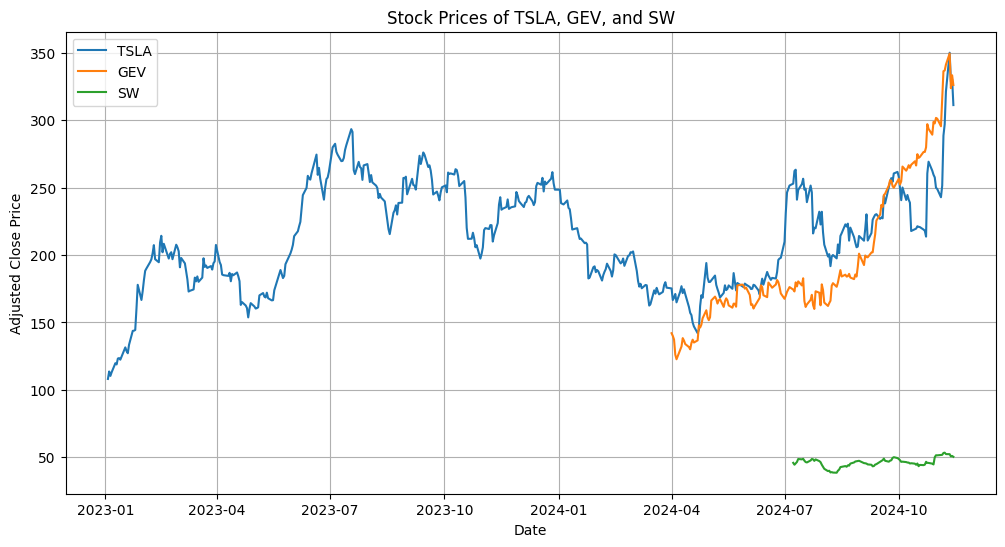

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the tickers and the date range for analysis
tickers = ['TSLA', 'GEV', 'SW']
start_date = '2023-01-01'
end_date = '2024-11-16'

# Download stock data
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Plot the stock prices over time
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)

# Customize the chart
plt.title('Stock Prices of TSLA, GEV, and SW')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()
plt.show()


In [4]:
import yfinance as yf
import pandas as pd

# Define sector ETFs for major sectors
sector_etfs = {
    "Technology": "XLK",
    "Financials": "XLF",
    "Healthcare": "XLV",
    "Energy": "XLE",
    "Consumer Discretionary": "XLY",
    "Utilities": "XLU"
}

# Download historical data
data = yf.download(list(sector_etfs.values()), start="2020-01-01", end="2024-11-16")['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Calculate sector return correlations
correlation_matrix = returns.corr()
print(correlation_matrix)


[*********************100%***********************]  6 of 6 completed


Ticker       XLE       XLF       XLK       XLU       XLV       XLY
Ticker                                                            
XLE     1.000000  0.718709  0.421767  0.418807  0.473216  0.465524
XLF     0.718709  1.000000  0.666340  0.617847  0.710673  0.723378
XLK     0.421767  0.666340  1.000000  0.497827  0.704840  0.846100
XLU     0.418807  0.617847  0.497827  1.000000  0.700292  0.507344
XLV     0.473216  0.710673  0.704840  0.700292  1.000000  0.652168
XLY     0.465524  0.723378  0.846100  0.507344  0.652168  1.000000


[*********************100%***********************]  6 of 6 completed


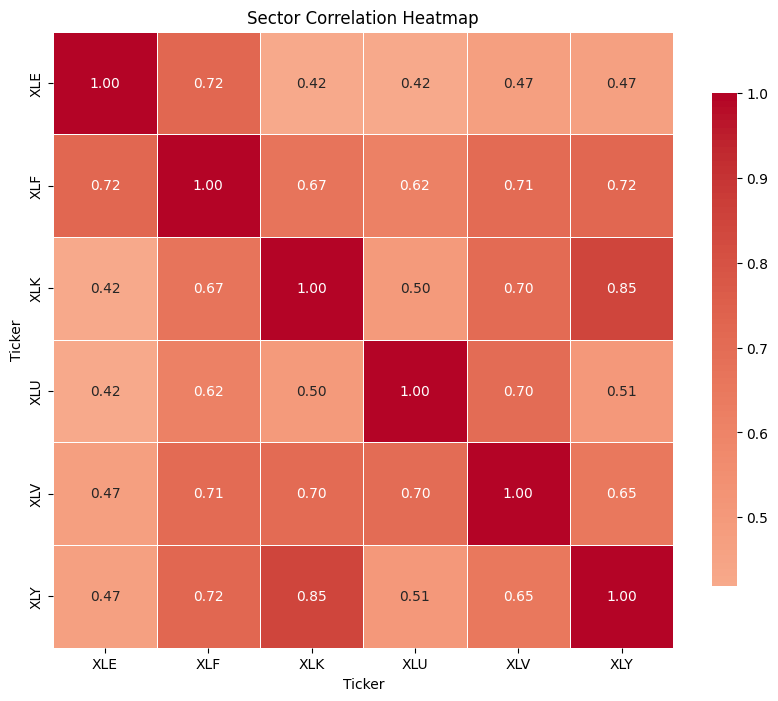

In [5]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define sector ETFs for major sectors
sector_etfs = {
    "Technology": "XLK",
    "Financials": "XLF",
    "Healthcare": "XLV",
    "Energy": "XLE",
    "Consumer Discretionary": "XLY",
    "Utilities": "XLU"
}

# Download historical data
data = yf.download(list(sector_etfs.values()), start="2020-01-01", end="2024-11-16")['Adj Close']

# Calculate daily returns
returns = data.pct_change()

# Calculate sector return correlations
correlation_matrix = returns.corr()

# Plot heatmap of sector correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", center=0,
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Sector Correlation Heatmap")
plt.show()


[*********************100%***********************]  6 of 6 completed


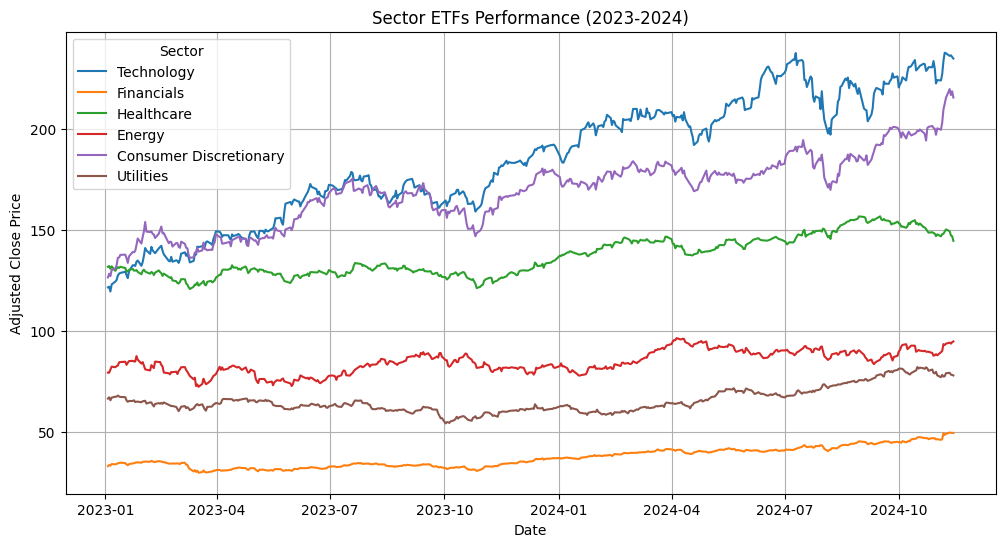

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the sector ETFs
sector_etfs = {
    "Technology": "XLK",
    "Financials": "XLF",
    "Healthcare": "XLV",
    "Energy": "XLE",
    "Consumer Discretionary": "XLY",
    "Utilities": "XLU"
}

# Define the date range for analysis
start_date = '2023-01-01'
end_date = '2024-11-16'

# Download stock data for the sector ETFs
data = yf.download(list(sector_etfs.values()), start=start_date, end=end_date)['Adj Close']

# Plot the sector ETF prices over time
plt.figure(figsize=(12, 6))
for sector, etf in sector_etfs.items():
    plt.plot(data.index, data[etf], label=sector)

# Customize the chart
plt.title('Sector ETFs Performance (2023-2024)')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend(title="Sector")
plt.grid(True)
plt.show()
